In [43]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import cv2 
from matplotlib import image as mpimg
import random 
from os import listdir
from sklearn.preprocessing import LabelBinarizer 
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array , array_to_img
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D , Activation , Flatten , Dropout , Dense 
from sklearn.model_selection import train_test_split 



ValueError: num must be an integer with 1 <= num <= 16, not 17

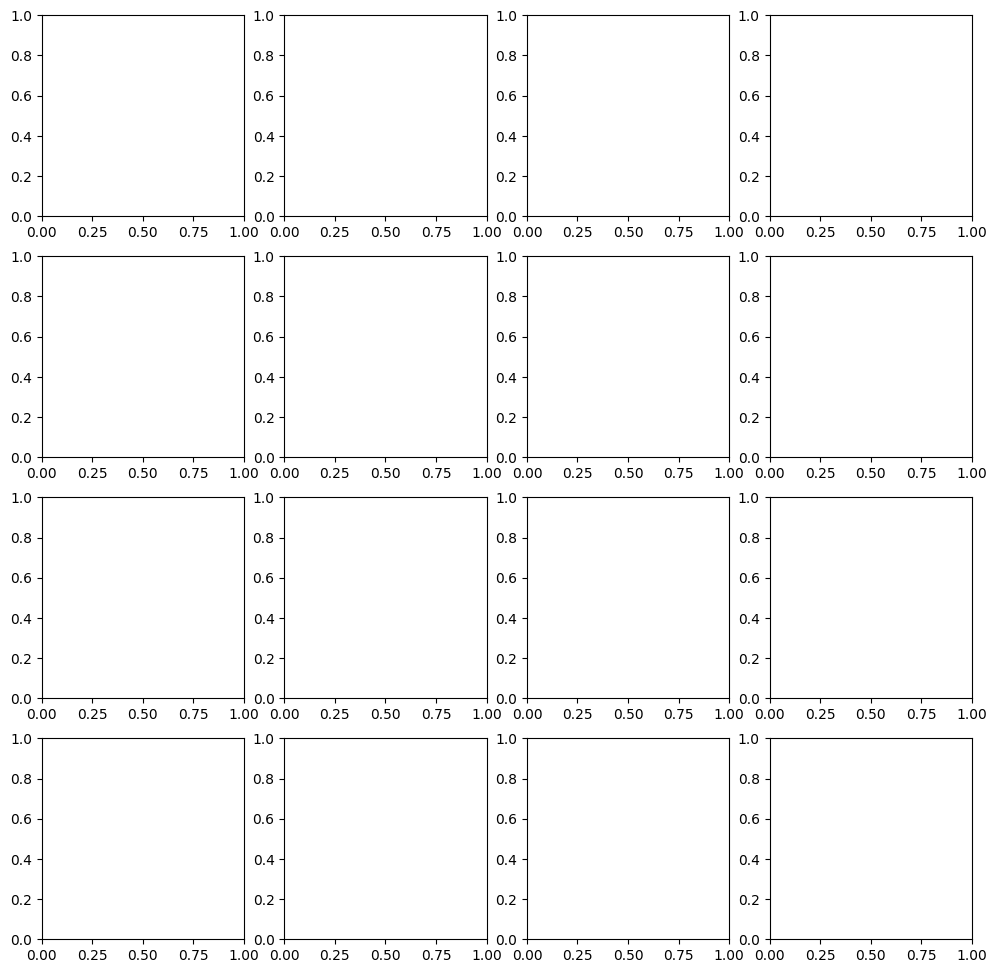

In [8]:
plt.figure (figsize = (12 , 12 ))

for i in range(1 , 20):
    plt.subplot(4 , 4 , i )
    plt.tight_layout()
    rand_img = 

In [9]:
os.listdir(a)

NameError: name 'os' is not defined

In [12]:
os.listdir()

['main.ipynb', 'birds.csv', '.git', '.gitignore', 'a']

In [23]:
random.choice (listdir)

'.gitignore'

In [22]:
listdir()

['main.ipynb', 'birds.csv', '.git', '.gitignore', 'a']

In [61]:
test = random.choice(listdir('a/train/ABBOTTS BOOBY'))
path = 'a/train/ABBOTTS BOOBY/' + test 

In [62]:
img = path 

In [63]:
img = mpimg.imread(path)

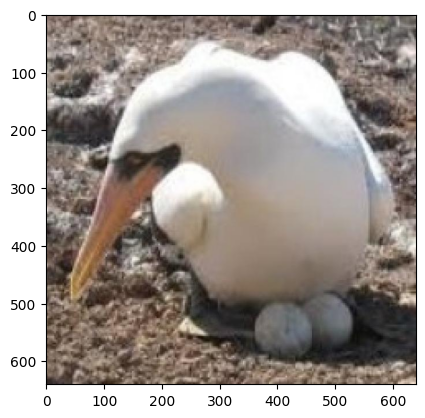

In [68]:
plt.imshow(img)
plt.show()

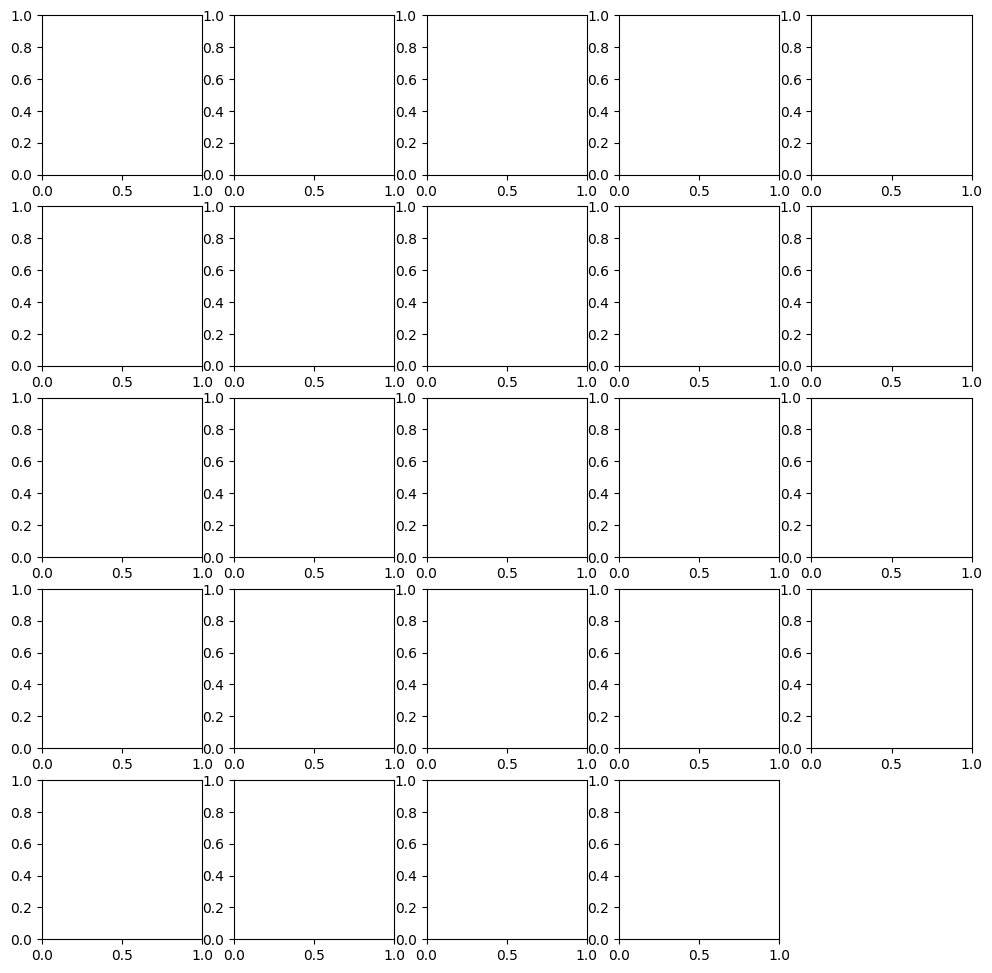

In [75]:
plt.figure(figsize =( 12 ,12 ))
path = 'a/train/ABBOTTS BOOBY/'
for i in range( 1   , 25):
    plt.subplot( 5 , 5 , i )
    plt.
